,car_age,km_driven,price_new,accident_count,door_count,fuel,transmission,y_true,y_pred,timestamp
0,15.0,144020.0,42810.0,4.0,3.0,diesel,automatic,569.0,1246.0,2017-01-24 08:00:00.000
1,12.0,57078.0,31835.0,3.0,3.0,electric,automatic,4277.0,4924.0,2017-01-24 08:00:33.600
2,2.0,76288.0,31851.0,3.0,5.0,diesel,automatic,7011.0,5744.0,2017-01-24 08:01:07.200


,key,start_index,end_index,start_date,end_date,realized_rmse,estimated_rmse,upper_confidence_rmse,lower_confidence_rmse,sampling_error_rmse,...,lower_threshold_rmse,alert_rmse,realized_rmsle,estimated_rmsle,upper_confidence_rmsle,lower_confidence_rmsle,sampling_error_rmsle,upper_threshold_rmsle,lower_threshold_rmsle,alert_rmsle
0,[0:5999],0,5999,2017-02-16 16:00:00,2017-02-18 23:59:26.400,NaN,1067.416369,1098.460396,1036.372342,10.348009,...,1014.276167,False,NaN,0.265777,0.272494,0.259060,0.002239,0.271511,0.263948,False
1,[6000:11999],6000,11999,2017-02-19 00:00:00,2017-02-21 07:59:26.400,NaN,1062.741369,1093.785396,1031.697342,10.348009,...,1014.276167,False,NaN,0.266766,0.273483,0.260049,0.002239,0.271511,0.263948,False
2,[12000:17999],12000,17999,2017-02-21 08:00:00,2017-02-23 15:59:26.400,NaN,1054.533326,1085.577353,1023.489299,10.348009,...,1014.276167,False,NaN,0.267806,0.274523,0.261089,0.002239,0.271511,0.263948,False


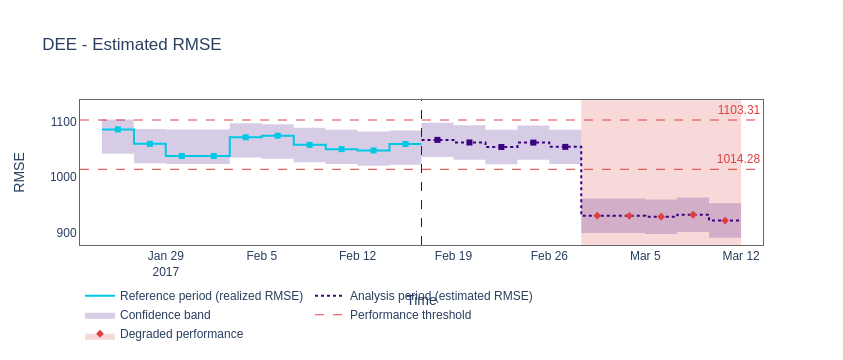

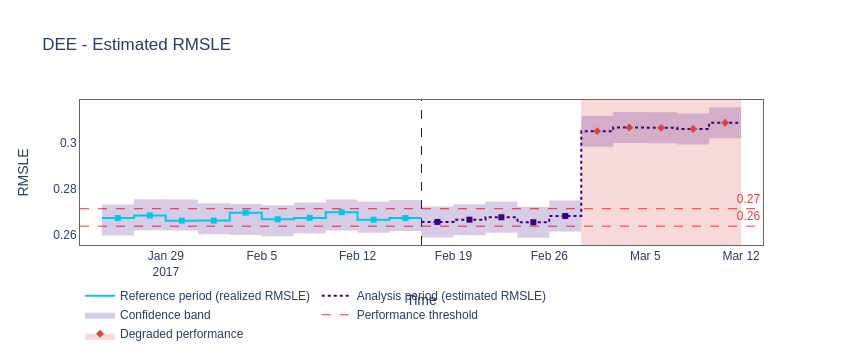

In [6]:
import pandas as pd
import nannyml as nml
from IPython.display import display

reference, analysis, analysis_target = nml.load_synthetic_car_price_dataset()
display(reference.head(3))

estimator = nml.DEE(
    feature_column_names=['car_age', 'km_driven', 'price_new', 'accident_count', 'door_count', 'fuel', 'transmission'],
    y_pred='y_pred',
    y_true='y_true',
    timestamp_column_name='timestamp',
    metrics=['rmse', 'rmsle'],
    chunk_size=6000,
)
estimator.fit(reference)

results = estimator.estimate(analysis)
display(results.data.head(3))

for metric in estimator.metrics:
    fig1 = results.plot(kind='performance', metric=metric, plot_reference=True)
    fig1.show()
    fig1.write_image(f"../_static/tutorial-perf-est-regression-{metric}.svg")